# Data Collection

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/kgovindarajudev/Downloads/taxi_fare.csv",index_col=0)
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,,,,,,,,,,,,,,,,,
1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


# Data Understanding

In [3]:
df.shape

(212345, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212345 entries, 1 to 1
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   tpep_pickup_datetime   212345 non-null  object 
 1   tpep_dropoff_datetime  212345 non-null  object 
 2   passenger_count        212345 non-null  int64  
 3   pickup_longitude       212345 non-null  float64
 4   pickup_latitude        212345 non-null  float64
 5   RatecodeID             212345 non-null  int64  
 6   store_and_fwd_flag     212345 non-null  object 
 7   dropoff_longitude      212345 non-null  float64
 8   dropoff_latitude       212345 non-null  float64
 9   payment_type           212345 non-null  int64  
 10  fare_amount            212345 non-null  float64
 11  extra                  212345 non-null  float64
 12  mta_tax                212345 non-null  float64
 13  tip_amount             212345 non-null  float64
 14  tolls_amount           212345 non-null  float6

In [5]:
df.describe()

,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


# Feature Engineering

## Checking for the null columns


In [6]:
df.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

## Dropping unwanted columns and duplicates


In [7]:
columns= df.columns
for col in columns:
    print(f"{col}: \n Unique Values:", df[col].nunique(), "\n", df[col].unique())
    print("**************************************************")

tpep_pickup_datetime: 
 Unique Values: 61208 
 ['2016-03-01 00:00:00' '2016-03-01 00:00:01' '2016-03-01 00:00:02' ...
 '2016-03-01 12:15:36' '2016-03-01 12:15:37' '2016-03-01 12:15:38']
**************************************************
tpep_dropoff_datetime: 
 Unique Values: 63607 
 ['2016-03-01 00:07:55' '2016-03-01 00:11:06' '2016-03-01 00:31:06' ...
 '2016-03-01 12:37:29' '2016-03-01 12:38:53' '2016-03-01 12:38:22']
**************************************************
passenger_count: 
 Unique Values: 7 
 [1 2 3 5 6 4 0]
**************************************************
pickup_longitude: 
 Unique Values: 14794 
 [-73.97674561 -73.98348236 -73.78202057 ... -73.82849884 -73.83630371
 -73.87155914]
**************************************************
pickup_latitude: 
 Unique Values: 30504 
 [40.76515198 40.76792526 40.64480972 ... 40.72326279 40.79697418
 40.64451218]
**************************************************
RatecodeID: 
 Unique Values: 7 
 [ 1  3  2  5  4  6 99]
*************

In [8]:
df.drop(columns=['store_and_fwd_flag','extra','mta_tax','improvement_surcharge','tolls_amount','fare_amount','tip_amount','tolls_amount'],inplace=True)


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)


### haversine function  to calculate distance

In [11]:
# haversine function  to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    lat1 = lat1 * math.pi / 180.0
    lat2 = lat2 * math.pi / 180.0

    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    
    rad = 6371  # Earth radius in kilometers
    c = 2 * math.asin(math.sqrt(a))
    return rad * c


# Apply the function row-wise
df['trip_distance'] = df.apply(
    lambda row: haversine(
        row['pickup_latitude'], row['pickup_longitude'],
        row['dropoff_latitude'], row['dropoff_longitude']
    ),
    axis=1
)

#Now df will have a new column 'trip_distance' with the computed distances

df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,total_amount,trip_distance
VendorID,,,,,,,,,,,
1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,-74.004265,40.746128,1,12.35,3.138096
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,-74.005943,40.733166,1,15.35,4.303331
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,-73.974541,40.675770,1,63.80,16.600142
2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,-73.969650,40.757767,1,41.62,9.046547
2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,-74.177170,40.695053,1,113.80,20.400022


### Converting Date&Time


In [12]:
# Convert pickup and drop time to datetime (in UTC)
df['pickup_time'] = pd.to_datetime(df['tpep_pickup_datetime'], utc=True)
df['drop_time'] = pd.to_datetime(df['tpep_dropoff_datetime'], utc=True)

In [13]:
# Convert to EDT 
df['pickup_time_EDT'] = df['pickup_time'].dt.tz_convert('America/New_York')
df['drop_time_EDT'] = df['drop_time'].dt.tz_convert('America/New_York')

In [14]:
# Calculate Trip Duration 
df['trip_duration'] =  df['drop_time_EDT'] -df['pickup_time_EDT']

# in sec
df['trip_duration_sec'] = df['trip_duration'].dt.total_seconds()

# in minutes
df['trip_duration_min'] = df['trip_duration'].dt.total_seconds() / 60

In [15]:
# Extract AM/PM

df['pickup_am_pm'] = df['pickup_time_EDT'].dt.strftime('%p')

In [16]:
# Get day of week: 0 = Monday, 6 = Sunday
df['day_of_week'] = df['pickup_time_EDT'].dt.weekday

# Create flag for Weekend (Saturday=5, Sunday=6)
df['is_weekend'] = df['day_of_week'].apply(lambda x: x >= 5)

In [17]:
df['month'] = df['pickup_time_EDT'].dt.month

In [18]:
#"night" as hours between 10 PM and 6 AM:
df['hour'] = df['pickup_time_EDT'].dt.hour
df['is_night'] = df['hour'].apply(lambda h: h >= 22 or h < 6)

In [19]:
columns= df.columns
for col in columns:
    print(f"{col}: \n Unique Values:", df[col].nunique(), "\n", df[col].unique())
    print("**************************************************")

tpep_pickup_datetime: 
 Unique Values: 61208 
 ['2016-03-01 00:00:00' '2016-03-01 00:00:01' '2016-03-01 00:00:02' ...
 '2016-03-01 12:15:36' '2016-03-01 12:15:37' '2016-03-01 12:15:38']
**************************************************
tpep_dropoff_datetime: 
 Unique Values: 63607 
 ['2016-03-01 00:07:55' '2016-03-01 00:11:06' '2016-03-01 00:31:06' ...
 '2016-03-01 12:37:29' '2016-03-01 12:38:53' '2016-03-01 12:38:22']
**************************************************
passenger_count: 
 Unique Values: 7 
 [1 2 3 5 6 4 0]
**************************************************
pickup_longitude: 
 Unique Values: 14794 
 [-73.97674561 -73.98348236 -73.78202057 ... -73.82849884 -73.83630371
 -73.87155914]
**************************************************
pickup_latitude: 
 Unique Values: 30504 
 [40.76515198 40.76792526 40.64480972 ... 40.72326279 40.79697418
 40.64451218]
**************************************************
RatecodeID: 
 Unique Values: 7 
 [ 1  3  2  5  4  6 99]
*************

In [20]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration','pickup_time',
       'drop_time', 'pickup_time_EDT', 'drop_time_EDT','is_weekend','trip_duration_min','RatecodeID'], axis=1, inplace=True)
df.head()

,passenger_count,payment_type,total_amount,trip_distance,trip_duration_sec,pickup_am_pm,day_of_week,month,hour,is_night
VendorID,,,,,,,,,,
1,1,1,12.35,3.138096,475.0,PM,0,2,19,False
1,1,1,15.35,4.303331,666.0,PM,0,2,19,False
2,2,1,63.80,16.600142,1866.0,PM,0,2,19,False
2,3,1,41.62,9.046547,0.0,PM,0,2,19,False
2,5,1,113.80,20.400022,0.0,PM,0,2,19,False


### Handling the missing values


In [21]:
col1= ['passenger_count', 'total_amount', 'trip_distance', 'trip_duration_sec']
for col in col1:
    count_incorrect = (df[col] == 0).sum()
    print(f"{col}: incorrect values = {count_incorrect}")
    print("**************************************************")

passenger_count: incorrect values = 9
**************************************************
total_amount: incorrect values = 38
**************************************************
trip_distance: incorrect values = 2982
**************************************************
trip_duration_sec: incorrect values = 130
**************************************************


In [22]:
# update min passenger count in place of the value 0
"""

mean_tripdistance = df.loc[df['trip_distance'] != 0, 'trip_distance'].min()
df.loc[df['trip_distance'] == 0, 'trip_distance'] = mean_tripdistance

mean_duration = df.loc[df['trip_duration_sec'] != 0, 'trip_duration_sec'].mean()
df.loc[df['trip_duration_sec'] == 0, 'trip_duration_sec'] = mean_duration


mean_fareamount = df.loc[df['fare_amount'] != 0, 'fare_amount'].mean()
df.loc[df['fare_amount'] == 0, 'fare_amount'] = mean_fareamount


mean_totalamount = df.loc[df['total_amount'] != 0, 'total_amount'].mean()
df.loc[df['total_amount'] == 0, 'total_amount'] = mean_totalamount
"""

min_passengercount = df.loc[df['passenger_count'] != 0, 'passenger_count'].min()
df.loc[df['passenger_count'] == 0, 'passenger_count'] = min_passengercount

In [23]:
(len(df[(df['trip_duration_sec'] == 0) | (df['total_amount'] == 0)  | (df['trip_distance'] == 0)])/len(df))*100

1.4754291365466576

In [24]:
#drop the rows with 0 in columns trip_duration_sec, total_amount,fare_amount and trip_distance

df_filtered = df[~((df['trip_duration_sec'] == 0) |  (df['total_amount'] == 0) | (df['trip_distance'] == 0))]
df_filtered.shape

(209212, 10)

In [25]:
col1= ['total_amount', 'trip_duration_sec','trip_distance']
for col in col1:
    count_incorrect = (df_filtered[col] <= 0).sum()
    print(f"{col}: incorrect values = {count_incorrect}")
    print("**************************************************")

total_amount: incorrect values = 101
**************************************************
trip_duration_sec: incorrect values = 1
**************************************************
trip_distance: incorrect values = 0
**************************************************


In [26]:
# remove the trip_duration_sec in negative value

df_filtered = df_filtered[(df_filtered['trip_duration_sec'] >=0)  ]
df_filtered.shape

(209211, 10)

In [27]:
#update all negative values as positve

#df_filtered.loc[:, 'fare_amount'] = df_filtered['fare_amount'].abs()
df_filtered.loc[:, 'total_amount'] = df_filtered['total_amount'].abs()
df_filtered.loc[:, 'trip_duration_sec'] = df_filtered['trip_duration_sec'].abs()
#df_filtered.loc[:, 'trip_duration_min'] = df_filtered['trip_duration_min'].abs()
#df_filtered.loc[:, 'tip_amount'] = df_filtered['tip_amount'].abs()

In [28]:
col1= [ 'total_amount', 'trip_distance', 'trip_duration_sec']
for col in col1:
    count_incorrect = (df_filtered[col] <= 0).sum()
    print(f"{col}: incorrect values = {count_incorrect}")
    print("**************************************************")

total_amount: incorrect values = 0
**************************************************
trip_distance: incorrect values = 0
**************************************************
trip_duration_sec: incorrect values = 0
**************************************************


## EDA

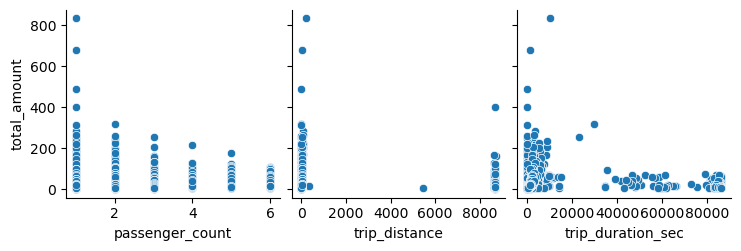

In [29]:
#  ****************Fare vs. Distance *************************
import matplotlib.pyplot as plt
import seaborn as sns
#sns.pairplot(y=['total_amount'], x=['passenger_count','payment_type','trip_distance','trip_duration_sec','pickup_am_pm','day_of_week','month','hour','is_night'], data=df_filtered)
sns.pairplot(df_filtered, x_vars =['passenger_count','trip_distance','trip_duration_sec'], y_vars =['total_amount'])



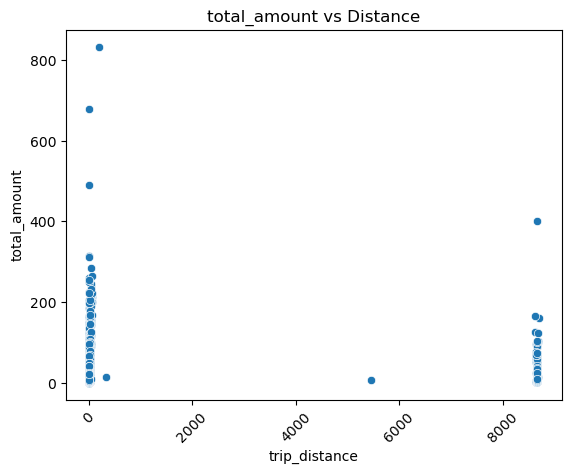

<Figure size 1600x1000 with 0 Axes>

In [30]:
#  ****************Fare vs. Distance *************************
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(y='total_amount', x='trip_distance', data=df_filtered)
plt.title('total_amount vs Distance')
plt.xticks(rotation=45)
#plt.legend(loc='upper left', fontsize='small')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.figure(figsize=(16,10))

plt.tight_layout()
plt.show()

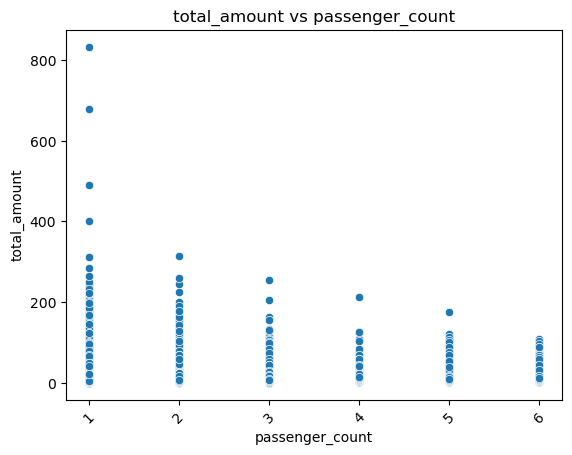

<Figure size 1600x1000 with 0 Axes>

In [31]:
#  ****************Fare vs. passenger_count *************************

sns.scatterplot(y='total_amount', x='passenger_count', data=df_filtered)
plt.title('total_amount vs passenger_count')
plt.xticks(rotation=45)
#plt.legend(loc='upper left', fontsize='small')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.figure(figsize=(16,10))

plt.tight_layout()
plt.show()

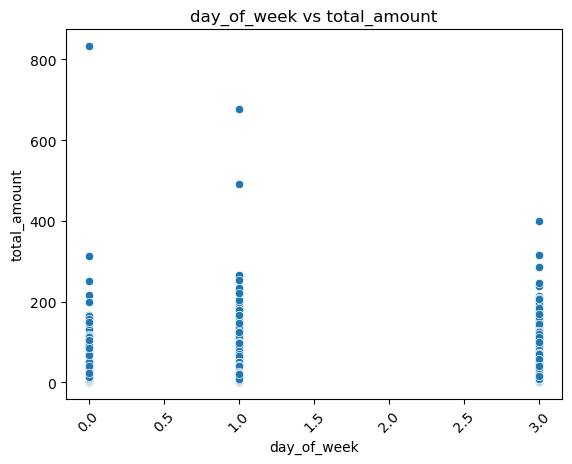

<Figure size 1600x1000 with 0 Axes>

In [32]:
sns.scatterplot(x='day_of_week', y='total_amount', data=df_filtered)
plt.title('day_of_week vs total_amount')
plt.xticks(rotation=45)
#plt.legend(loc='upper left', fontsize='small')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.figure(figsize=(16,10))
plt.tight_layout()
plt.show()

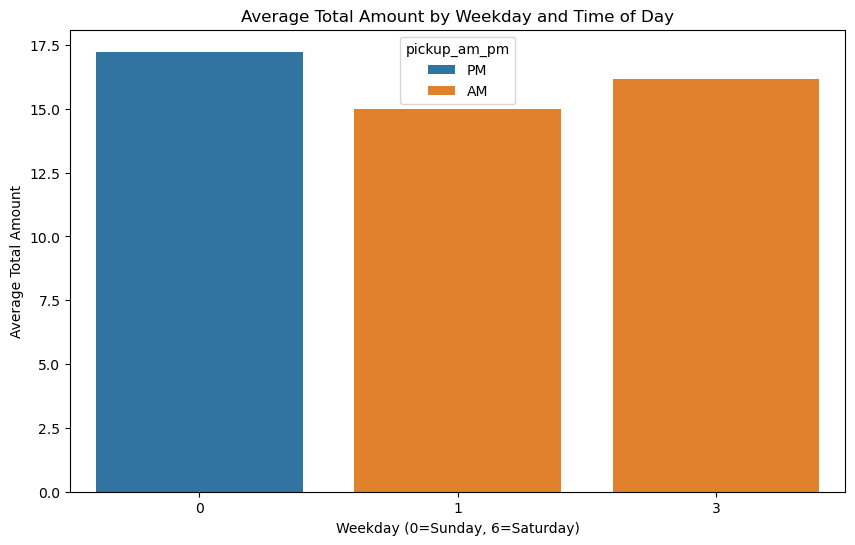

In [33]:

# --- Grouped bar chart: average total_amount ---
avg_amount = df_filtered.groupby(['day_of_week', 'pickup_am_pm'])['total_amount'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='total_amount', hue='pickup_am_pm', data=avg_amount)
plt.title('Average Total Amount by Weekday and Time of Day')
plt.xlabel('Weekday (0=Sunday, 6=Saturday)')
plt.ylabel('Average Total Amount')
plt.legend(title='pickup_am_pm')
plt.show()


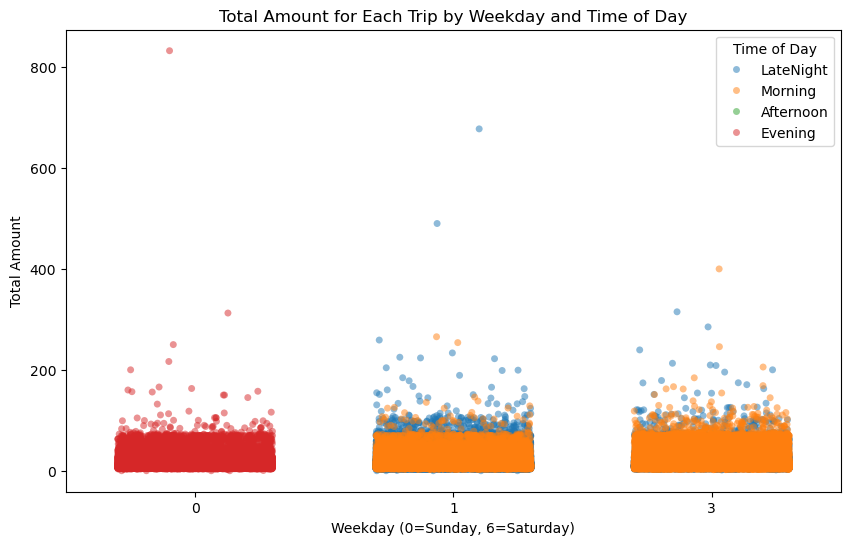

In [34]:
bins  = [0, 6, 12, 18, 24]           
labels = ['LateNight','Morning','Afternoon','Evening']

data = df_filtered.copy()

data['time_bin'] = pd.cut(data['hour'], bins=bins, labels=labels, right=False)

#   Scatter plot - individual trips 
plt.figure(figsize=(10,6))
sns.stripplot(x='day_of_week', y='total_amount', hue='time_bin', data=data, jitter=0.3, alpha=0.5)
plt.title('Total Amount for Each Trip by Weekday and Time of Day')
plt.xlabel('Weekday (0=Sunday, 6=Saturday)')
plt.ylabel('Total Amount')
plt.legend(title='Time of Day')
plt.show()

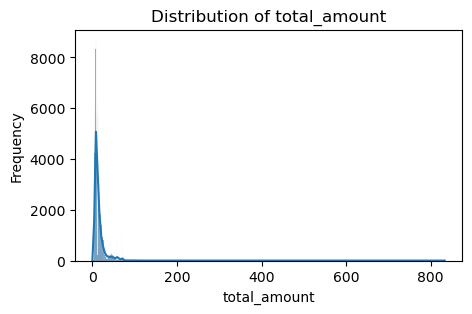

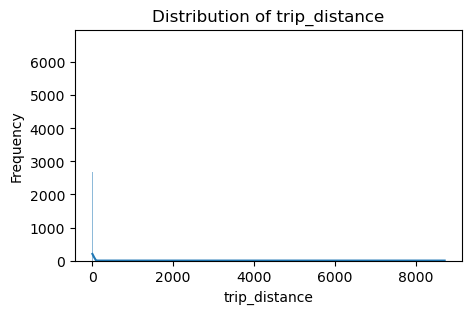

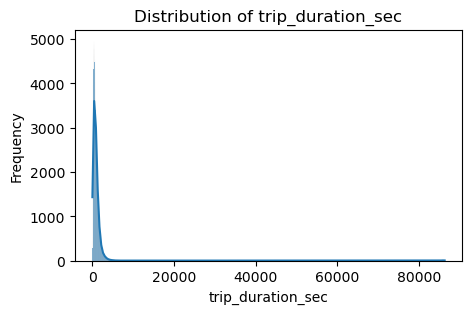

In [35]:
num_cols = ['total_amount', 'trip_distance', 'trip_duration_sec']
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Handling Outliers

In [36]:
#exclude Target column "Total Amount" from dataset
#df_filtered = df_filtered[~(df_filtered['total_amount'])]
#df_filtered.head()

In [37]:
#df_filtered[df_filtered['total_amount'] > 350]

In [38]:
#(len(df_filtered[df_filtered['total_amount'] > 350])/len(df_filtered))*100

In [39]:
#df_filtered = df_filtered[(df_filtered['total_amount'] <= 350)]
#df_filtered.shape

In [40]:
classification_cols= df_filtered.select_dtypes(include=['object']).columns
classification_cols

Index(['pickup_am_pm'], dtype='object')

In [41]:
num_cols= df_filtered.select_dtypes(exclude=['object','bool']).columns
num_cols

Index(['passenger_count', 'payment_type', 'total_amount', 'trip_distance',
       'trip_duration_sec', 'day_of_week', 'month', 'hour'],
      dtype='object')

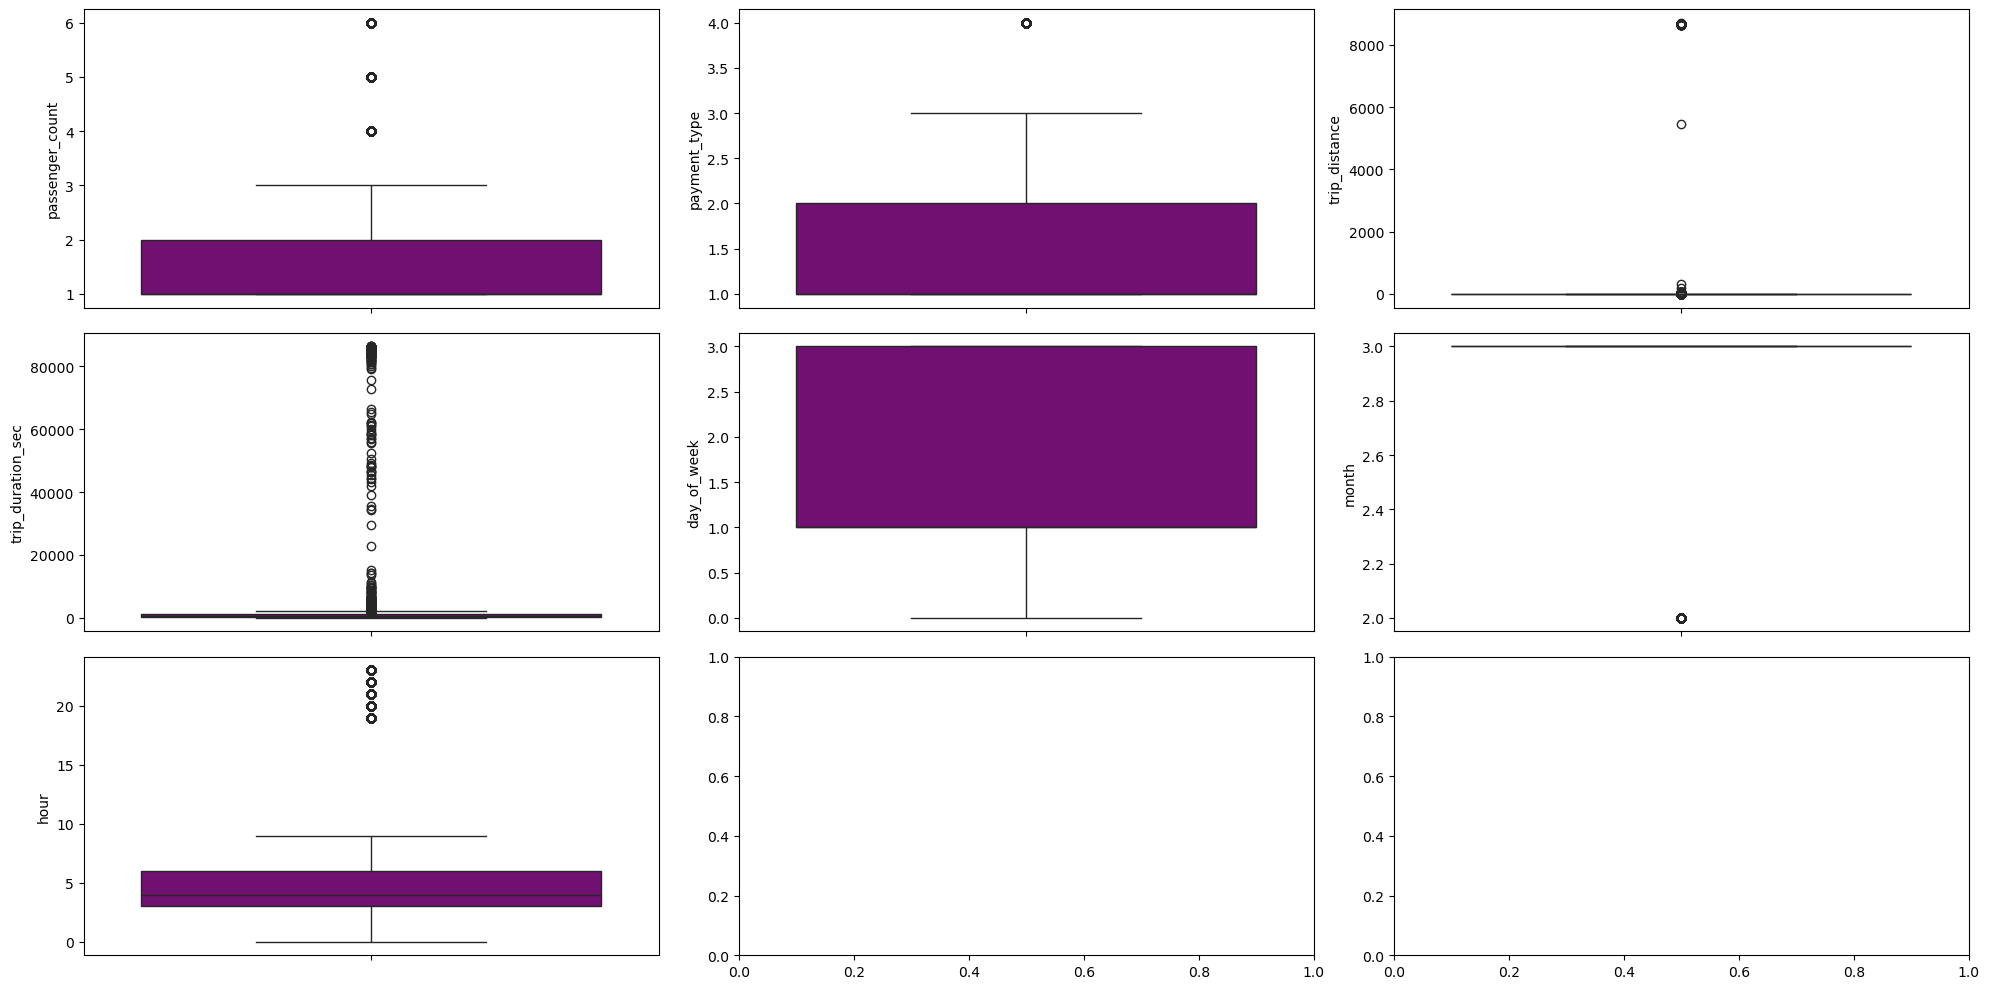

In [42]:

# Loop through numerical columns and create boxplots (by excluding Target Column)
numerical_cols = ['passenger_count', 'payment_type', 'trip_distance', 'trip_duration_sec', 'day_of_week','month', 'hour']
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()  # flatten to 1D array for easy indexing
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_filtered[col], ax=axes[i], color='purple')
plt.tight_layout()
plt.show()

In [43]:
df_filtered.describe()

,passenger_count,payment_type,total_amount,trip_distance,trip_duration_sec,day_of_week,month,hour
count,209211.000000,209211.000000,209211.000000,209211.000000,209211.000000,209211.000000,209211.000000,209211.000000
mean,1.768851,1.323640,15.640730,20.564099,974.218468,1.689873,2.917342,5.720622
std,1.471389,0.477242,13.436408,386.955234,3244.746915,1.073220,0.275366,4.871690
min,1.000000,1.000000,0.300000,0.000424,1.000000,0.000000,2.000000,0.000000
25%,1.000000,1.000000,8.300000,1.182564,405.000000,1.000000,3.000000,3.000000
50%,1.000000,1.000000,11.750000,1.965298,678.000000,1.000000,3.000000,4.000000
75%,2.000000,2.000000,17.250000,3.602405,1100.000000,3.000000,3.000000,6.000000
max,6.000000,4.000000,832.800000,8713.463111,86363.000000,3.000000,3.000000,23.000000


In [44]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209211 entries, 1 to 1
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   passenger_count    209211 non-null  int64  
 1   payment_type       209211 non-null  int64  
 2   total_amount       209211 non-null  float64
 3   trip_distance      209211 non-null  float64
 4   trip_duration_sec  209211 non-null  float64
 5   pickup_am_pm       209211 non-null  object 
 6   day_of_week        209211 non-null  int32  
 7   month              209211 non-null  int32  
 8   hour               209211 non-null  int32  
 9   is_night           209211 non-null  bool   
dtypes: bool(1), float64(3), int32(3), int64(2), object(1)
memory usage: 13.8+ MB


In [45]:
# IQR Method
desc = df_filtered.describe()  # summary statistics
Q1 = desc.loc['25%']  # 25th percentile
Q3 = desc.loc['75%']  # 75th percentile

IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#numerical_cols = df_filtered.select_dtypes(include='number').columns
#df_filtered = data.copy()
numerical_cols = ['passenger_count', 'payment_type',  'trip_distance', 'trip_duration_sec', 'day_of_week','month', 'hour']

for col in numerical_cols:
    df_filtered[col] = df_filtered[col].clip(lower=lower_bound[col], upper=upper_bound[col])

## Plotting  After outliers removal

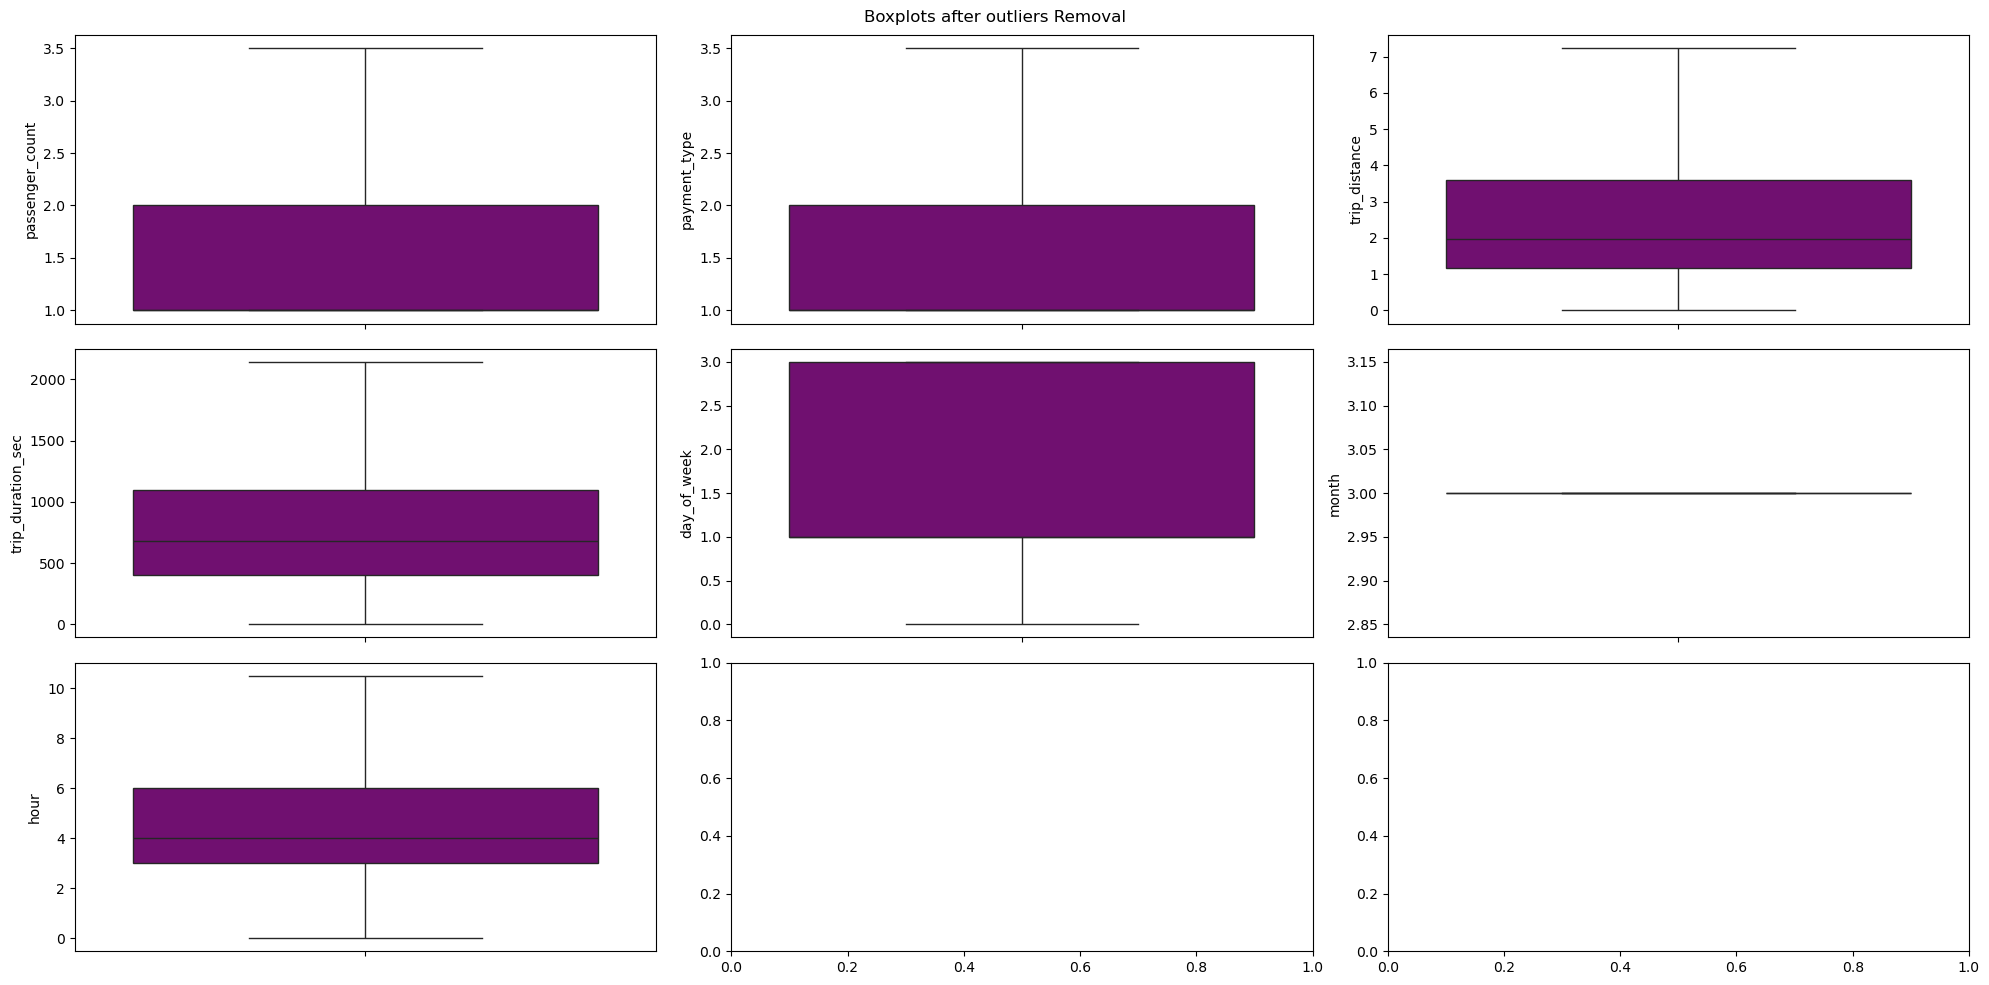

In [46]:

# Loop through numerical columns and create boxplots
numerical_cols = ['passenger_count', 'payment_type', 'trip_distance', 'trip_duration_sec', 'day_of_week','month', 'hour']

fig, axes = plt.subplots(3, 3, figsize=(20, 10))
plt.suptitle("Boxplots after outliers Removal")
axes = axes.flatten()  # flatten to 1D array for easy indexing
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_filtered[col], ax=axes[i], color='purple')
plt.tight_layout()
plt.show()

# Skewness in Data

In [47]:
#numerical_cols=df_filtered.select_dtypes(exclude=['object','bool']).columns
skewness = df_filtered[numerical_cols].skew()
skewness

passenger_count      1.391112
payment_type         0.867872
trip_distance        1.098034
trip_duration_sec    0.962063
day_of_week          0.238942
month                0.000000
hour                 0.528943
dtype: float64

## Plotting the distribution plots before Transform

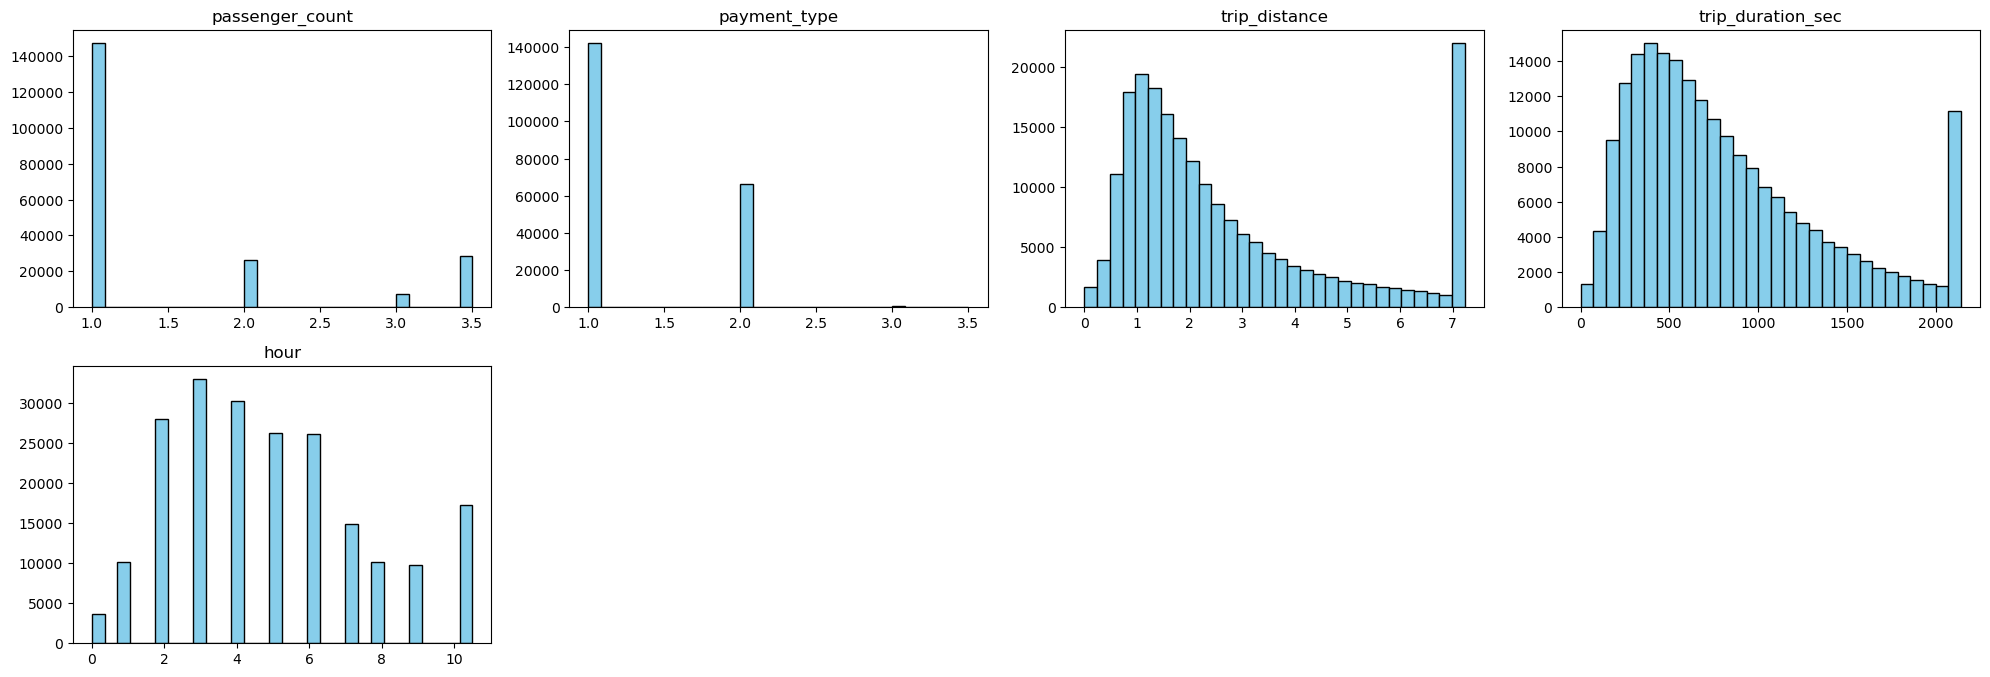

In [48]:
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index

# Plot histograms before transformation
plt.figure(figsize=(20, 10))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size as needed
    plt.hist(df_filtered[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [49]:
df_filtered.isnull().sum()

passenger_count      0
payment_type         0
total_amount         0
trip_distance        0
trip_duration_sec    0
pickup_am_pm         0
day_of_week          0
month                0
hour                 0
is_night             0
dtype: int64

In [50]:

import numpy as np

# Columns that are positively skewed
#pos_skewed_cols = ['fare_amount', 'total_amount','trip_duration_sec','trip_distance','tip_amount']
pos_skewed_cols = ['trip_duration_sec','trip_distance']

# Apply log transformation to positively skewed columns

df_filtered[pos_skewed_cols] = df_filtered[pos_skewed_cols].apply(lambda x: np.log1p(x))

## Plotting the distribution plots After Transform

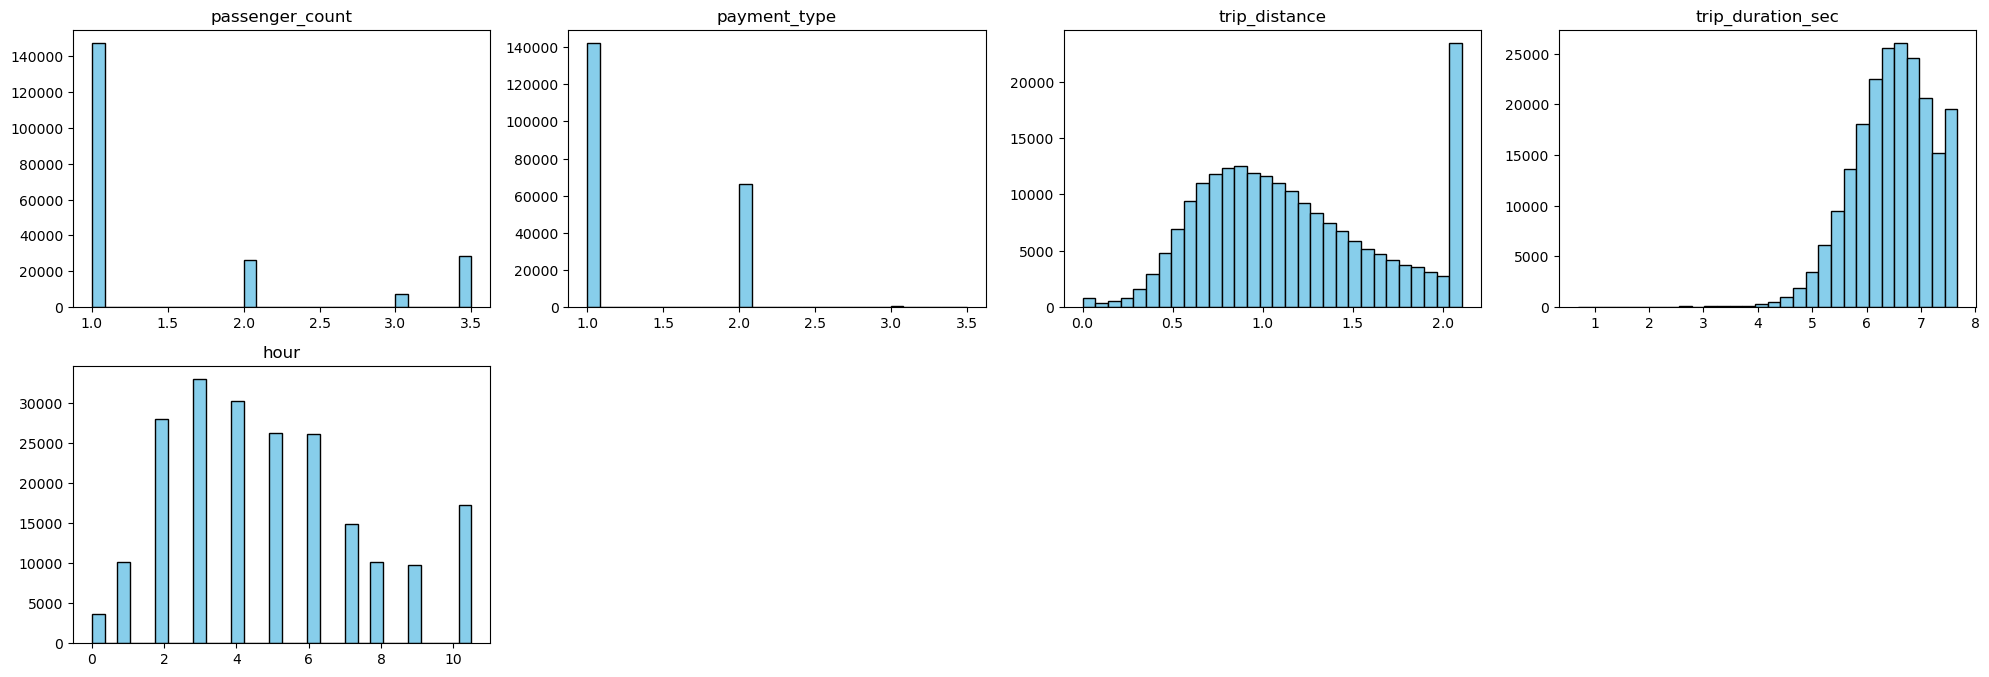

In [51]:
# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index

# Plot histograms before transformation
plt.figure(figsize=(20, 10))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(3, 4, i)  # Adjust grid size as needed
    plt.hist(df_filtered[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

## Converting bool columns to numerical

In [52]:
#df_filtered['is_weekend'] = df_filtered['is_weekend'].astype(int)
df_filtered['is_night'] = df_filtered['is_night'].astype(int)
df_filtered.head()

,passenger_count,payment_type,total_amount,trip_distance,trip_duration_sec,pickup_am_pm,day_of_week,month,hour,is_night
VendorID,,,,,,,,,,
1,1.0,1.0,12.35,1.420236,6.165418,PM,0,3,10.5,0
1,1.0,1.0,15.35,1.668335,6.502790,PM,0,3,10.5,0
2,2.0,1.0,63.80,2.108049,7.532088,PM,0,3,10.5,0
1,1.0,3.0,21.80,2.108049,6.871091,PM,0,3,10.5,0
1,1.0,1.0,8.80,0.608349,5.703782,PM,0,3,10.5,0


In [53]:
df_filtered.select_dtypes(include=['object']).columns

Index(['pickup_am_pm'], dtype='object')

In [54]:
#df_filtered['store_and_fwd_flag'] = df_filtered['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
#df_filtered['pickup_am_pm'] = df_filtered['pickup_am_pm'].map({'AM': 0, 'PM': 1})


In [55]:
df_filtered.head()

,passenger_count,payment_type,total_amount,trip_distance,trip_duration_sec,pickup_am_pm,day_of_week,month,hour,is_night
VendorID,,,,,,,,,,
1,1.0,1.0,12.35,1.420236,6.165418,PM,0,3,10.5,0
1,1.0,1.0,15.35,1.668335,6.502790,PM,0,3,10.5,0
2,2.0,1.0,63.80,2.108049,7.532088,PM,0,3,10.5,0
1,1.0,3.0,21.80,2.108049,6.871091,PM,0,3,10.5,0
1,1.0,1.0,8.80,0.608349,5.703782,PM,0,3,10.5,0


## Encoding the categorical columns

In [56]:
# Encode Features
# Label Encode 'Category'
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df_filtered['payment_type_encoded'] = label_encoder.fit_transform(df_filtered['payment_type'])

df_filtered['pickup_am_pm_encoded'] = label_encoder.fit_transform(df_filtered['pickup_am_pm'])

df_filtered['day_of_week_encoded'] = label_encoder.fit_transform(df_filtered['day_of_week'])

df_filtered['is_night_encoded'] = label_encoder.fit_transform(df_filtered['is_night'])


In [57]:
df_filtered = df_filtered.drop(columns=['payment_type','pickup_am_pm','day_of_week','is_night'])
df_filtered.head()

,passenger_count,total_amount,trip_distance,trip_duration_sec,month,hour,payment_type_encoded,pickup_am_pm_encoded,day_of_week_encoded,is_night_encoded
VendorID,,,,,,,,,,
1,1.0,12.35,1.420236,6.165418,3,10.5,0,1,0,0
1,1.0,15.35,1.668335,6.502790,3,10.5,0,1,0,0
2,2.0,63.80,2.108049,7.532088,3,10.5,0,1,0,0
1,1.0,21.80,2.108049,6.871091,3,10.5,2,1,0,0
1,1.0,8.80,0.608349,5.703782,3,10.5,0,1,0,0


##  Scale features 

In [58]:
X = df_filtered.drop(columns=['total_amount'])   # All variables except Target
y = df_filtered['total_amount']                  # Target variable

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data (important)
X_train_scaled = scaler.fit_transform(X_train[['trip_duration_sec', 'trip_distance']])

# Transform the test data using the already fitted scaler (do not fit again)
X_test_scaled = scaler.transform(X_test[['trip_duration_sec', 'trip_distance']])

# Now X_train_scaled and X_test_scaled can be used in your model
print(X_train_scaled[:5])  # Check the first few rows of scaled training data
print(X_test_scaled[:5])   # Check the first few rows of scaled test data

[[0.46697349 0.20074321]
 [0.78700929 0.27604243]
 [0.8071052  0.30191782]
 [0.70620893 0.19606788]
 [0.85838041 0.67854871]]
[[0.72193176 0.56916664]
 [0.80914547 0.48121055]
 [0.99869015 1.        ]
 [0.77942408 0.42840394]
 [1.         0.90807091]]


In [60]:

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df_filtered['fare_amount'] = scaler.fit_transform(df_filtered[['fare_amount']])
#df_filtered['total_amount'] = scaler.fit_transform(df_filtered[['total_amount']])
#df_filtered['tip_amount'] = scaler.fit_transform(df_filtered[['tip_amount']])
#df_filtered['trip_duration_min'] = scaler.fit_transform(df_filtered[['trip_duration_min']])
#df_filtered['trip_duration_sec'] = scaler.fit_transform(df_filtered[['trip_duration_sec']])
#df_filtered['trip_distance'] = scaler.fit_transform(df_filtered[['trip_distance']])

# Feature Selection

In [61]:
# RFE (Recursive Feature Elimination)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=8)
selector = selector.fit(X, y)

selected_columns = X.columns[selector.support_]
print(selected_columns)

Index(['passenger_count', 'trip_distance', 'trip_duration_sec', 'hour',
       'payment_type_encoded', 'pickup_am_pm_encoded', 'day_of_week_encoded',
       'is_night_encoded'],
      dtype='object')


In [62]:
# Lasso Regression

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X, y)

selected = X.columns[lasso.coef_ != 0]
print(selected)

Index(['passenger_count', 'trip_distance', 'trip_duration_sec', 'hour',
       'payment_type_encoded', 'pickup_am_pm_encoded', 'day_of_week_encoded'],
      dtype='object')


In [63]:
#Use ElasticNetCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)
selected = X.columns[lasso.coef_ != 0]
print(selected)

Index(['trip_distance', 'trip_duration_sec', 'hour', 'payment_type_encoded',
       'pickup_am_pm_encoded', 'day_of_week_encoded'],
      dtype='object')


In [70]:
#Use RandomForest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

trip_distance           0.676054
trip_duration_sec       0.260435
hour                    0.023093
payment_type_encoded    0.020433
passenger_count         0.009843
day_of_week_encoded     0.005845
is_night_encoded        0.002741
pickup_am_pm_encoded    0.001556
month                   0.000000
dtype: float64


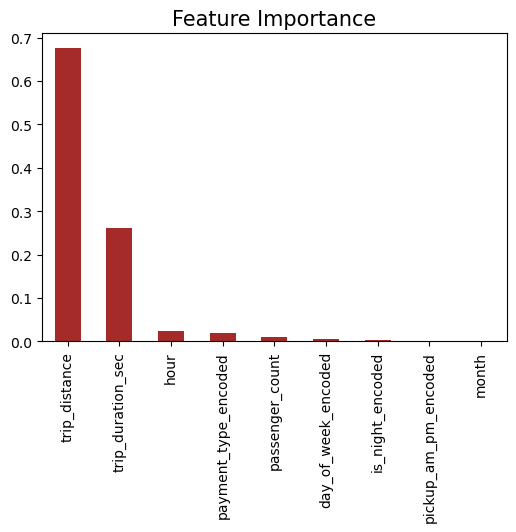

In [71]:
plt.figure(figsize= (6,4))
imp_feature = pd.Series(rf.feature_importances_, index = X.columns)
imp_feature.nlargest(10).plot(kind = 'bar', color='brown')
plt.title('Feature Importance', fontsize=15)
plt.show()

In [72]:
#Use RandomForest - less n_estimators

from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf1.fit(X, y)

importances = pd.Series(rf1.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

trip_distance           0.676328
trip_duration_sec       0.260802
hour                    0.023139
payment_type_encoded    0.019907
passenger_count         0.009752
day_of_week_encoded     0.005869
is_night_encoded        0.002735
pickup_am_pm_encoded    0.001468
month                   0.000000
dtype: float64


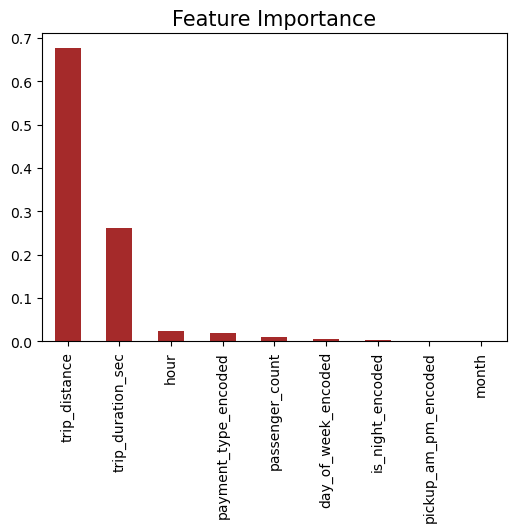

In [73]:
plt.figure(figsize= (6,4))
imp_feature = pd.Series(rf1.feature_importances_, index = X.columns)
imp_feature.nlargest(10).plot(kind = 'bar', color='brown')
plt.title('Feature Importance', fontsize=15)
plt.show()

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
et_importance = pd.DataFrame({"column":X.columns,"scores":model.feature_importances_}).sort_values('scores',ascending =False)
et_importance

,column,scores
1,trip_distance,0.619093
2,trip_duration_sec,0.311634
5,payment_type_encoded,0.021584
4,hour,0.021562
0,passenger_count,0.011318
7,day_of_week_encoded,0.006759
6,pickup_am_pm_encoded,0.004624
8,is_night_encoded,0.003426
3,month,0.000000


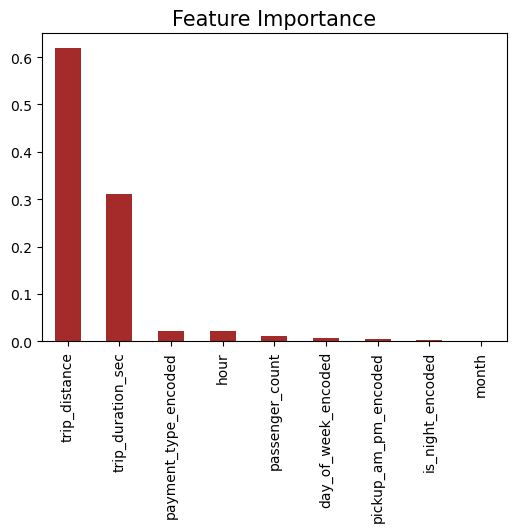

In [75]:
plt.figure(figsize= (6,4))
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(10).plot(kind = 'bar', color='brown')
plt.title('Feature Importance', fontsize=15)
plt.show()

# Model Building

In [76]:
top_features = ['total_amount','trip_distance','trip_duration_sec','hour','payment_type_encoded','passenger_count','day_of_week_encoded','is_night_encoded','pickup_am_pm_encoded']
df_filtered = df_filtered.reset_index(drop=True)
df_filtered_revised = df_filtered[top_features]

In [77]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer


In [78]:
#df_model = df_filtered_revised.sample(frac=0.357, random_state=42)  # sampling

In [79]:
X = df_filtered_revised.drop('total_amount', axis=1)
y = df_filtered_revised['total_amount']

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209211 entries, 0 to 209210
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   trip_distance         209211 non-null  float64
 1   trip_duration_sec     209211 non-null  float64
 2   hour                  209211 non-null  float64
 3   payment_type_encoded  209211 non-null  int64  
 4   passenger_count       209211 non-null  float64
 5   day_of_week_encoded   209211 non-null  int64  
 6   is_night_encoded      209211 non-null  int64  
 7   pickup_am_pm_encoded  209211 non-null  int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 12.0 MB


In [81]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 209211 entries, 0 to 209210
Series name: total_amount
Non-Null Count   Dtype  
--------------   -----  
209211 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [82]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scalers
scaler_duration = MinMaxScaler()
scaler_distance = MinMaxScaler()

# Reshape is needed to convert Series to 2D array
X_train['trip_duration_sec'] = scaler_duration.fit_transform(X_train[['trip_duration_sec']])
X_test['trip_duration_sec'] = scaler_duration.transform(X_test[['trip_duration_sec']])

X_train['trip_distance'] = scaler_distance.fit_transform(X_train[['trip_distance']])
X_test['trip_distance'] = scaler_distance.transform(X_test[['trip_distance']])

# Now X_train_scaled and X_test_scaled can be used in your model
X_train.head()  # Check the first few rows of scaled training data
X_test.head()   # Check the first few rows of scaled test data

,trip_distance,trip_duration_sec,hour,payment_type_encoded,passenger_count,day_of_week_encoded,is_night_encoded,pickup_am_pm_encoded
19821,0.569167,0.721932,3.0,0,3.5,2,1,0
32134,0.481211,0.809145,5.0,0,1.0,2,1,0
11062,1.000000,0.998690,3.0,0,1.0,2,1,0
142901,0.428404,0.779424,3.0,0,1.0,1,1,0
166177,0.908071,1.000000,4.0,0,1.0,1,1,0


In [84]:
X_test.head()

,trip_distance,trip_duration_sec,hour,payment_type_encoded,passenger_count,day_of_week_encoded,is_night_encoded,pickup_am_pm_encoded
19821,0.569167,0.721932,3.0,0,3.5,2,1,0
32134,0.481211,0.809145,5.0,0,1.0,2,1,0
11062,1.000000,0.998690,3.0,0,1.0,2,1,0
142901,0.428404,0.779424,3.0,0,1.0,1,1,0
166177,0.908071,1.000000,4.0,0,1.0,1,1,0


In [85]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Initialize result dictionaries
results = {}
results_train = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    y_pred_train = model.predict(X_train)  # Predict on train data

    # Evaluating Train Data
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    results_train[name] = {
        "MAE_Train": mae_train,
        "MSE_Train": mse_train,
        "RMSE_Train": rmse_train,
        "R2 Score_Train": r2_train
    }

    # Evaluating Test Data
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
print("Evaluating Train Data")
results_train_df = pd.DataFrame(results_train).T
print(results_train_df)

print("Evaluating Test Data")
results_df = pd.DataFrame(results).T
print(results_df)

Evaluating Train Data
                             MAE_Train   MSE_Train  RMSE_Train  R2 Score_Train
Linear Regression             4.985354   86.299878    9.289773        0.524440
Decision Tree Regressor       0.483313   14.658650    3.828662        0.919223
Random Forest Regressor       0.990354   18.307575    4.278735        0.899115
XGBoost Regressor             1.694651   29.566433    5.437502        0.837073
Ridge                         4.985101   86.299880    9.289773        0.524440
Lasso                         5.314392  108.226100   10.403177        0.403615
Gradient Boosting Regressor   1.779499   34.807874    5.899820        0.808189
Evaluating Test Data
                                  MAE         MSE       RMSE  R2 Score
Linear Regression            5.024344   80.449486   8.969364  0.544965
Decision Tree Regressor      2.287163   50.268775   7.090048  0.715672
Random Forest Regressor      1.912047   34.994572   5.915621  0.802065
XGBoost Regressor            1.837173   3

In [86]:
Newresult_df = pd.concat([results_df, results_train_df], axis=1)
Newresult_df

,MAE,MSE,RMSE,R2 Score,MAE_Train,MSE_Train,RMSE_Train,R2 Score_Train
Linear Regression,5.024344,80.449486,8.969364,0.544965,4.985354,86.299878,9.289773,0.524440
Decision Tree Regressor,2.287163,50.268775,7.090048,0.715672,0.483313,14.658650,3.828662,0.919223
Random Forest Regressor,1.912047,34.994572,5.915621,0.802065,0.990354,18.307575,4.278735,0.899115
XGBoost Regressor,1.837173,32.951176,5.740311,0.813623,1.694651,29.566433,5.437502,0.837073
Ridge,5.024096,80.449969,8.969391,0.544962,4.985101,86.299880,9.289773,0.524440
Lasso,5.364045,103.003824,10.149080,0.417394,5.314392,108.226100,10.403177,0.403615
Gradient Boosting Regressor,1.810305,29.920791,5.469990,0.830763,1.779499,34.807874,5.899820,0.808189


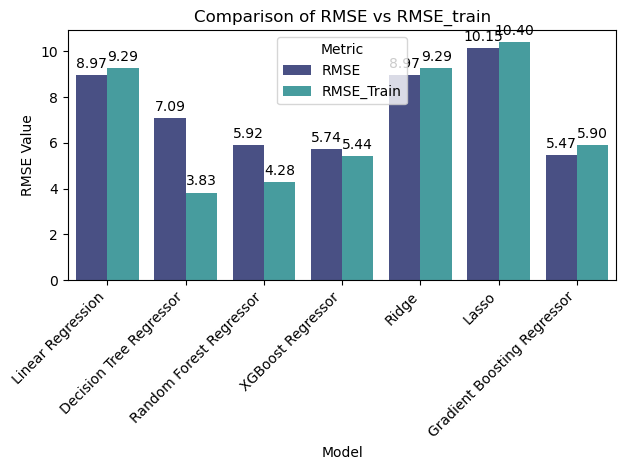

In [87]:
# Visualizations  Test RMSE by Model

Newresult_df_RMSE = Newresult_df[['RMSE', 'RMSE_Train']].copy()
df_long = Newresult_df_RMSE.reset_index().melt(id_vars='index', var_name='Metric',value_name='Value')
ax = sns.barplot(data=df_long, x='index', y='Value', hue='Metric', palette='mako')
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.title("Comparison of RMSE vs RMSE_train")
plt.xlabel("Model")
plt.ylabel("RMSE Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

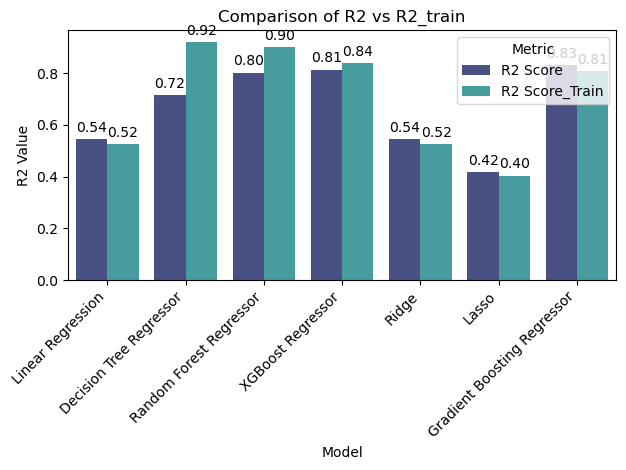

In [88]:
# Visualizations  Test R2 by Model
Newresult_df_RMSE = Newresult_df[['R2 Score', 'R2 Score_Train']].copy()
df_long = Newresult_df_RMSE.reset_index().melt(id_vars='index', var_name='Metric',value_name='Value')
ax = sns.barplot(data=df_long, x='index', y='Value', hue='Metric', palette='mako')
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)

plt.title("Comparison of R2 vs R2_train")
plt.xlabel("Model")
plt.ylabel("R2 Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
Newresult_df.head()

,MAE,MSE,RMSE,R2 Score,MAE_Train,MSE_Train,RMSE_Train,R2 Score_Train
Linear Regression,5.024344,80.449486,8.969364,0.544965,4.985354,86.299878,9.289773,0.524440
Decision Tree Regressor,2.287163,50.268775,7.090048,0.715672,0.483313,14.658650,3.828662,0.919223
Random Forest Regressor,1.912047,34.994572,5.915621,0.802065,0.990354,18.307575,4.278735,0.899115
XGBoost Regressor,1.837173,32.951176,5.740311,0.813623,1.694651,29.566433,5.437502,0.837073
Ridge,5.024096,80.449969,8.969391,0.544962,4.985101,86.299880,9.289773,0.524440


## Crossvalidation

In [90]:
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Prepare the results dictionary to store cross-validation results
results = {}

# Define scoring functions for MAE, MSE, RMSE, and R2
scoring = {
    'CV MAE': make_scorer(mean_absolute_error),
    'CV MSE': make_scorer(mean_squared_error),
    'CV RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'CV R2': make_scorer(r2_score)
}

# Perform cross-validation for each model
for name, model in models.items():
    model_scores = {}
    
    # For each scoring metric, perform cross-validation
    for score_name, score_func in scoring.items():
        # Get the cross-validation scores for the model using the scoring metric
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=score_func)  # 5-fold cross-validation
        model_scores[score_name] = cv_scores.mean()  # Store the average of the scores
    
    # Store the results in the dictionary
    results[name] = model_scores

# Convert results to DataFrame
cross_val_df = pd.DataFrame(results).T
cross_val_df

,CV MAE,CV MSE,CV RMSE,CV R2
Linear Regression,4.985756,86.321550,9.279626,0.525430
Decision Tree Regressor,2.307799,60.253710,7.715192,0.671642
Random Forest Regressor,1.905895,42.484219,6.540690,0.766270
XGBoost Regressor,1.834285,42.679331,6.503097,0.766417
Ridge,4.985441,86.321531,9.279625,0.525430
Lasso,5.314525,108.232344,10.394059,0.404571
Gradient Boosting Regressor,1.801549,37.215630,6.067413,0.796563


### Visualizations  Test RMSE & R² by Crossvalidation

C:\Users\kgovindarajudev\AppData\Local\Temp\ipykernel_23984\1218522060.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cross_val_df.reset_index(), x='index', y='CV R2', palette='crest')


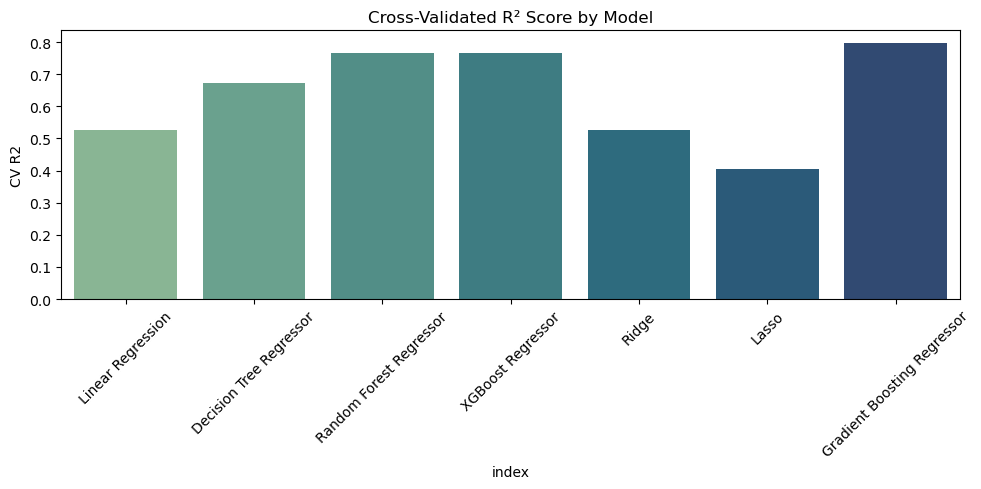

In [93]:

'''
# CV RMSE
plt.figure(figsize=(10, 5))
sns.barplot(data=cross_val_df.reset_index(), x='index', y='CV RMSE', palette='rocket')
plt.title("Cross-Validated RMSE by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''
# CV R²
plt.figure(figsize=(10, 5))
sns.barplot(data=cross_val_df.reset_index(), x='index', y='CV R2', palette='crest')
plt.title("Cross-Validated R² Score by Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Model Ranking Only

In [92]:
# Combine test and cross-val results
combined = results_df.join(cross_val_df)

# Rank models (lower RMSE better, higher R² better)
ranking = combined.copy()
ranking["RMSE Rank"] = ranking["RMSE"].rank()
ranking["R2 Rank"] = ranking["R2 Score"].rank(ascending=False)
ranking["CV RMSE Rank"] = ranking["CV RMSE"].rank()
ranking["CV R2 Rank"] = ranking["CV R2"].rank(ascending=False)

# Average rank for final model ranking
ranking["Average Rank"] = ranking[
    ["RMSE Rank", "R2 Rank", "CV RMSE Rank", "CV R2 Rank"]
].mean(axis=1)

# Sort by best average rank
ranking = ranking.sort_values("Average Rank")
print("Model Ranking:")
print(ranking[["RMSE", "R2 Score", "CV RMSE", "CV R2", "Average Rank"]])

Model Ranking:
                                  RMSE  R2 Score    CV RMSE     CV R2  \
Gradient Boosting Regressor   5.469990  0.830763   6.067413  0.796563   
XGBoost Regressor             5.740311  0.813623   6.503097  0.766417   
Random Forest Regressor       5.915621  0.802065   6.540690  0.766270   
Decision Tree Regressor       7.090048  0.715672   7.715192  0.671642   
Linear Regression             8.969364  0.544965   9.279626  0.525430   
Ridge                         8.969391  0.544962   9.279625  0.525430   
Lasso                        10.149080  0.417394  10.394059  0.404571   

                             Average Rank  
Gradient Boosting Regressor           1.0  
XGBoost Regressor                     2.0  
Random Forest Regressor               3.0  
Decision Tree Regressor               4.0  
Linear Regression                     5.5  
Ridge                                 5.5  
Lasso                                 7.0  


# Hyperparameter tuning for GradientBoostingRegressor  (GridSearch)

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid
'''
param_grid = {
    'n_estimators': [100,150, 175,200,225,250],
    'learning_rate': [0.01,0.03, 0.05,0.07, 0.1],
    'max_depth': [2,3,4, 5, 7],
    'min_samples_split': [2,3, 5],
    'min_samples_leaf': [1,2, 3],
}

'''
param_grid = {
    'n_estimators': [100,150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}

# Use negative RMSE as scoring
#scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Grid Search
gbr_random = GridSearchCV(
    gbr,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gbr_random.fit(X_train, y_train)

print("Best Parameters:", gbr_random.best_params_)
print("Best RMSE Score:", -gbr_random.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE Score: 5.324260838452235


In [79]:
predictions = gbr_random.predict(X_test)

In [80]:
from sklearn import metrics

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,predictions))
print("MAE :",metrics.mean_absolute_error(y_test,predictions))
print("MSE :",metrics.mean_squared_error(y_test,predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


Evaluating Test Data
-----------------------
R2 score: 0.7739942323984736
MAE : 1.832177262186812
MSE : 42.867261489499654
RMSE : 6.547309484780726


In [95]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter grid

param_grid = {
    'n_estimators': [100,150, 200,300,500],
    'learning_rate': [0.005,0.01, 0.02, 0.05, 0.1],
    'max_depth': [3, 5, 7,10,15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}

# Use negative RMSE as scoring
#scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Grid Search
gbr_random = GridSearchCV(
    gbr,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

gbr_random.fit(X_train, y_train)

print("Best Parameters:", gbr_random.best_params_)
print("Best RMSE Score:", -gbr_random.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Parameters: {'learning_rate': 0.02, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE Score: 5.316501599486729


In [96]:
predictions = gbr_random.predict(X_test)

In [97]:
from sklearn import metrics

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,predictions))
print("MAE :",metrics.mean_absolute_error(y_test,predictions))
print("MSE :",metrics.mean_squared_error(y_test,predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Evaluating Test Data
-----------------------
R2 score: 0.7704144567667797
MAE : 1.8492519821153013
MSE : 43.54624937421648
RMSE : 6.598958203702799


# Hyperparameter tuning for GradientBoostingRegressor  (Ramdom Search)

# reexecuted

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import uniform, randint
import numpy as np

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100,150, 175,200,225,250],
    'learning_rate': [0.01,0.03, 0.05,0.07, 0.1],
    'max_depth': [2,3,4, 5, 7],
    'min_samples_split': [2,3, 5],
    'min_samples_leaf': [1,2, 3],
}

# Use negative RMSE as scoring
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Randomized Search
gbr_random = RandomizedSearchCV(
    gbr,
    param_distributions=param_dist,  # We use param_dist for RandomizedSearchCV
    n_iter=10,                      # Number of random combinations to try
    cv=5,                           # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Scoring metric
    n_jobs=-1,                      # Use all available cores
    verbose=2,                      # Verbosity level
    random_state=42
)

# Fit the model
gbr_random.fit(X_train, y_train)

# Output the best parameters and the corresponding RMSE score
print("Best Parameters:", gbr_random.best_params_)
print("Best RMSE Score:", -gbr_random.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 175, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_rate': 0.1}
Best RMSE Score: 6.086930014730352


In [95]:
predictions_r = gbr_random.predict(X_test)

In [96]:
from sklearn import metrics

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,predictions_r))
print("MAE :",metrics.mean_absolute_error(y_test,predictions_r))
print("MSE :",metrics.mean_squared_error(y_test,predictions_r))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions_r)))


Evaluating Test Data
-----------------------
R2 score: 0.8281455904125398
MAE : 1.8567811178865719
MSE : 30.383582097831454
RMSE : 5.512130450001293


In [97]:
predictions_r1 = gbr_random.predict(X_train)

In [98]:
print("Evaluating Train Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_train,predictions_r1))
print("MAE :",metrics.mean_absolute_error(y_train,predictions_r1))
print("MSE :",metrics.mean_squared_error(y_train,predictions_r1))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,predictions_r1)))

Evaluating Train Data
-----------------------
R2 score: 0.7997506348790877
MAE : 1.8343502464180417
MSE : 36.33926530475986
RMSE : 6.028205811413531


In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import uniform, randint
import numpy as np

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [200,225,250,300,350,400,450,500],
    'learning_rate': [0.01,0.03, 0.05,0.07, 0.1],
    'max_depth': [2,3,4, 5, 7],
    'min_samples_split': [2,3, 5],
    'min_samples_leaf': [1,2, 3],
}

# Use negative RMSE as scoring
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Randomized Search
gbr_random = RandomizedSearchCV(
    gbr,
    param_distributions=param_dist,  # We use param_dist for RandomizedSearchCV
    n_iter=100,                      # Number of random combinations to try
    cv=5,                           # 5-fold cross-validation
   # scoring='neg_root_mean_squared_error',  # Scoring metric
    n_jobs=-1,                      # Use all available cores
    verbose=2,                      # Verbosity level
    random_state=42
)

# Fit the model
gbr_random.fit(X_train, y_train)

# Output the best parameters and the corresponding RMSE score
print("Best Parameters:", gbr_random.best_params_)
print("Best RMSE Score:", -gbr_random.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}
Best RMSE Score: -0.8358373766099231


In [104]:
predictions_r2 = gbr_random.predict(X_test)

In [105]:
predictions_r3 = gbr_random.predict(X_train)

In [106]:
from sklearn import metrics

print("Evaluating Train Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_train,predictions_r3))
print("MAE :",metrics.mean_absolute_error(y_train,predictions_r3))
print("MSE :",metrics.mean_squared_error(y_train,predictions_r3))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,predictions_r3)))


print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,predictions_r2))
print("MAE :",metrics.mean_absolute_error(y_test,predictions_r2))
print("MSE :",metrics.mean_squared_error(y_test,predictions_r2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions_r2)))

Evaluating Train Data
-----------------------
R2 score: 0.8535833025559447
MAE : 1.7850391365468516
MSE : 25.439203909970164
RMSE : 5.043729166992431
Evaluating Test Data
-----------------------
R2 score: 0.7667271393746884
MAE : 1.8789264206353327
MSE : 44.24563506033863
RMSE : 6.651739250777847


# Hyperparameter tuning for RandomForestRegressor

In [85]:

# Random Search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define your model
rf = RandomForestRegressor()

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 500),      # Random range of n_estimators
    'max_depth': [10, 20, None],            # Fixed list for max_depth
    'max_features' : ['log2', 'sqrt'],      # 
    'min_samples_split': randint(2, 20),    # Random range of min_samples_split
    'min_samples_leaf': randint(1, 20),     # Random range of min_samples_leaf
}

# Set up the randomized search with cross-validation
#random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

rf_random =     RandomizedSearchCV(estimator=  rf, param_distributions=  param_dist,  n_iter = 10, cv=5,scoring= 'neg_mean_squared_error',  n_jobs=1,verbose = 2, random_state=42,error_score='raise')
# Fit the model with the best hyperparameters found
rf_random.fit(X_train, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", rf_random.best_params_)
print("Best Score: ", rf_random.best_score_)


# Use the best model for predictions
best_model = rf_random.best_estimator_
predictions1 = best_model.predict(X_test)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  13.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  13.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  13.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  12.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  13.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=  14.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=  15.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=7, min_samples_spl

In [86]:
from sklearn import metrics

print("Evaluating Test Data")
print("-----------------------")
print('R2 score:',metrics.r2_score(y_test,predictions1))
print("MAE :",metrics.mean_absolute_error(y_test,predictions1))
print("MSE :",metrics.mean_squared_error(y_test,predictions1))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions1)))

Evaluating Test Data
-----------------------
R2 score: 0.7602810353782093
MAE : 1.8495554541366606
MSE : 45.46828892682213
RMSE : 6.743017790783451


## Saving the model as pickle file


In [99]:
import pickle

# Save encoders and model
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
    
with open('gbr_model.pkl','wb') as file:
    pickle.dump(gbr_random.best_estimator_, file)

In [100]:
ip = [[0.90,1.08,3.0,0,2.0,2,1,0]]
round(gbr_random.predict(np.array(ip))[0],2)

C:\Users\kgovindarajudev\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


33.39

In [101]:

# Load saved encoders and model
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

with open('gbr_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)

# Evaluate the predictions
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE of loaded model: {rmse:.4f}")





RMSE of loaded model: 5.5121


In [102]:
ip = [[0.90,1.08,3.0,0,2.0,2,1,0]]
round(loaded_model.predict(np.array(ip))[0],2)

C:\Users\kgovindarajudev\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


33.39